In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the data
data = pd.read_excel("News_Dataset.xlsx")

# Drop 'Sno', 'Gender', 'Name' columns
data.drop(['Sno', 'F0', 'Duration', 'MFCC', 'Formants',  'Gender'], axis=1, inplace=True)

# Split the data into features and target variable
X = data.drop(columns=['Target_Label'])
y = data['Target_Label']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_categorical = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.1, random_state=42)

X_train = X_train.iloc[:, :-1]

data_test = pd.DataFrame(X_test[:], columns=X_test.columns[:]) 

X_test = X_test.iloc[:, :-1]

# Build the sequential deep learning model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    #Dropout(0.1),
    Dense(64, activation='relu'),
    #Dropout(0.1),
    Dense(2, activation='softmax')  # Change the number of units to match the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.25, verbose=0)

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Decode the predicted labels
predicted_labels = label_encoder.inverse_transform(predicted_labels)

# Convert true labels back to original form
true_labels = label_encoder.inverse_transform(np.argmax(y_test, axis=1))
accuracy = accuracy_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)


1/1 [==============================] - 0s 63ms/step
Accuracy: 1.0


In [5]:
# Combine predictions with 'Name' and 'Gender'
output_df = pd.DataFrame({'Name': data_test['Name'], 'Prediction': predicted_labels.flatten()})

print(output_df)

                  Name  Prediction
27     M_surprise_male           0
40            H_sound7           1
26         M_hope_male           0
43            M_sound8           0
24  M_extremely_female           0


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Precision:", precision_score(true_labels, predicted_labels))
print("Recall:", recall_score(true_labels, predicted_labels))
print("F1 Score:", f1_score(true_labels, predicted_labels))

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


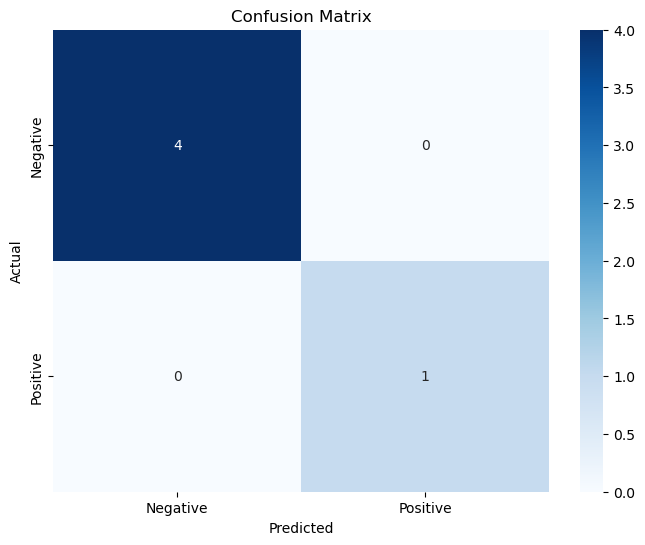

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels,predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

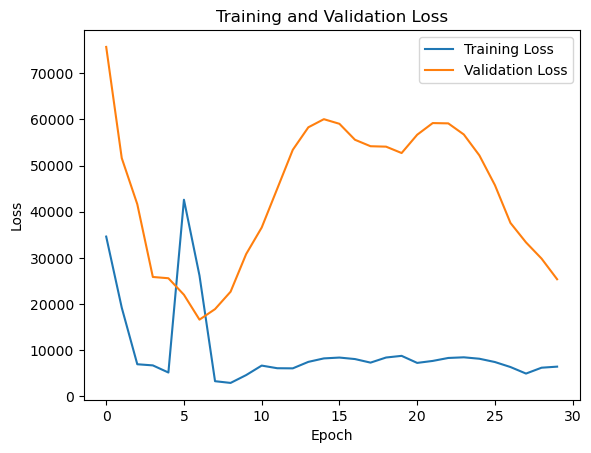

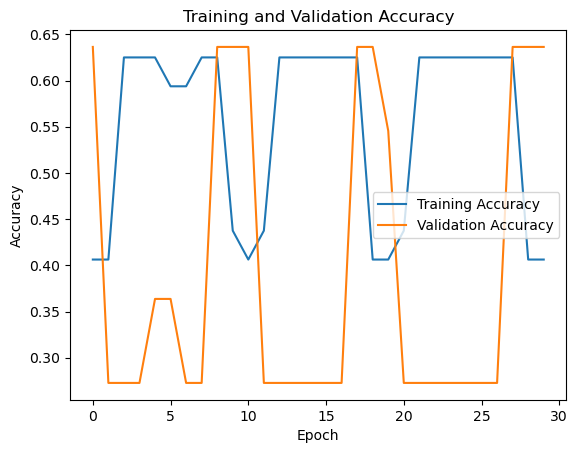

Model may be underfitting.


In [8]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# # Compare training and validation loss
if np.mean(history.history['loss']) < np.mean(history.history['val_loss']):
    print("Model may be underfitting.")
    
elif np.mean(history.history['loss']) > np.mean(history.history['val_loss']):
    print("Model may be overfitting.")
else:
    print("Model is correctly fitted.")

In [9]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]
    
    X_train = X_train.iloc[:, :-1]
    
    X_test = X_test.iloc[:, :-1]

    model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2, verbose=0)

    predictions = model.predict(X_test)
    predicted_labels = np.argmax(predictions, axis=1)

    # Decode the predicted labels
    predicted_labels = label_encoder.inverse_transform(predicted_labels)

    # Convert true labels back to original form
    true_labels = label_encoder.inverse_transform(np.argmax(y_test, axis=1))

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(true_labels, predicted_labels)
    accuracy_scores.append(accuracy)

print("Max Accuracy:", max(accuracy_scores))


1/1 [==============================] - 0s 16ms/step
Max Accuracy: 0.5555555555555556
